Current Working Directory: c:\Users\DIVESH\OneDrive\Documents\PROJECTS\smart_city_traffic_forecasting\notebooks
Train Data Columns: Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')
Test Data Columns: Index(['DateTime', 'Junction', 'ID'], dtype='object')
DateTime columns converted successfully.


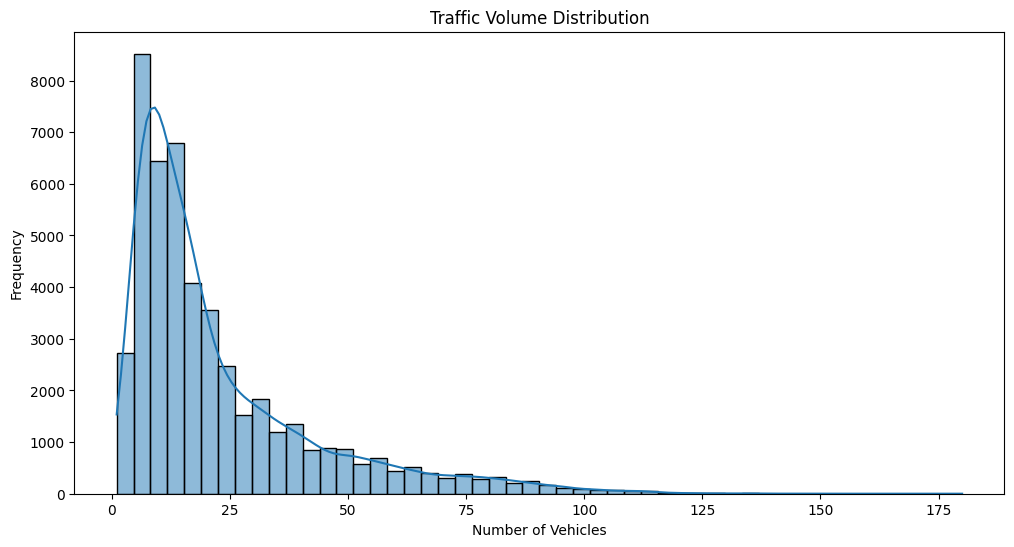

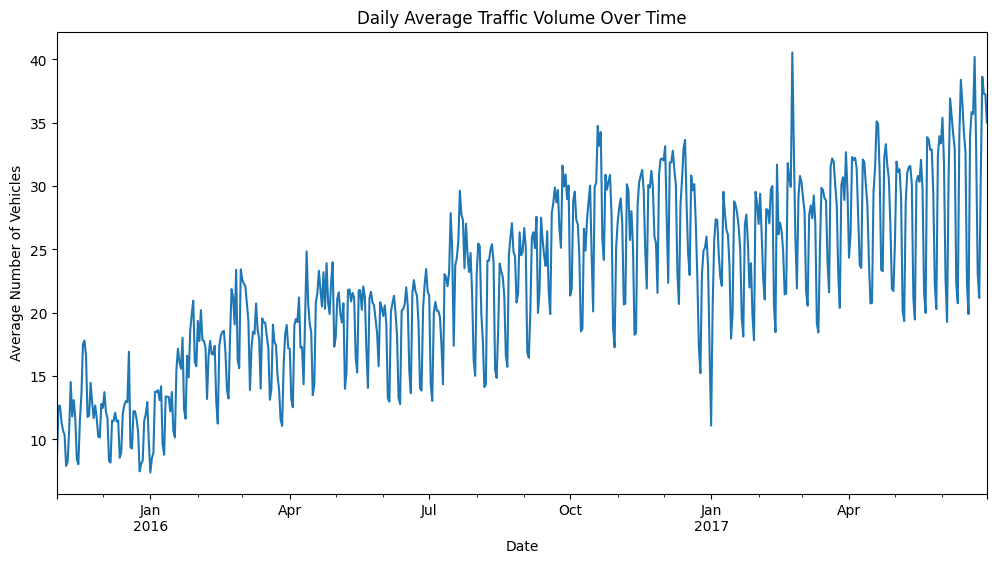

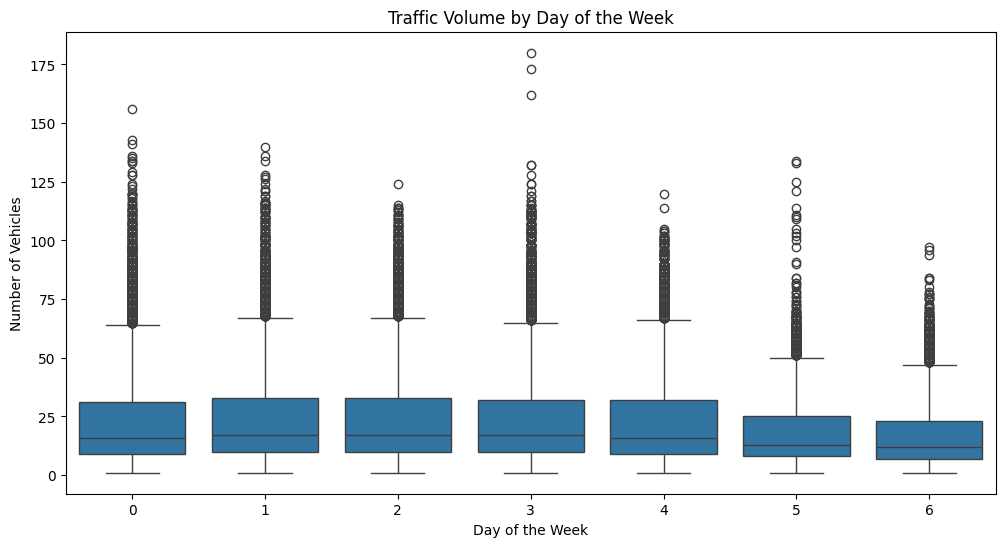

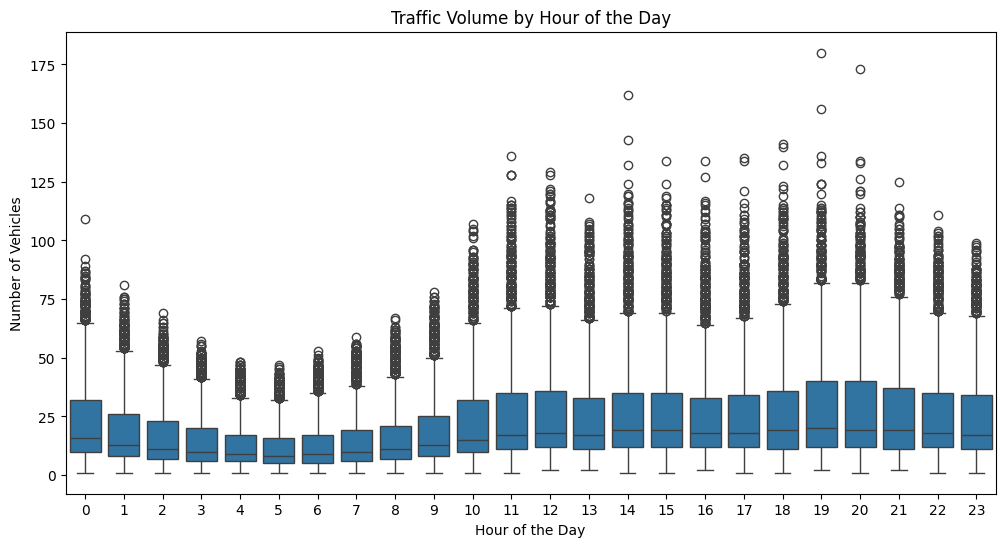

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Print current working directory
print("Current Working Directory:", os.getcwd())

# Load datasets
df_train = pd.read_csv(r'../data/raw/traffic_train.csv')
df_test = pd.read_csv(r'../data/raw/traffic_test.csv')

# Print column names to verify
print("Train Data Columns:", df_train.columns)
print("Test Data Columns:", df_test.columns)

# Convert 'DateTime' column to datetime format
# Specify the correct format
try:
    df_train['DateTime'] = pd.to_datetime(df_train['DateTime'], format='%d-%m-%Y %H:%M')
    df_test['DateTime'] = pd.to_datetime(df_test['DateTime'], format='%d-%m-%Y %H:%M')
    print("DateTime columns converted successfully.")
except ValueError as e:
    print("ValueError:", e)

# Feature Engineering for Train Data
df_train['day_of_week'] = df_train['DateTime'].dt.dayofweek
df_train['hour'] = df_train['DateTime'].dt.hour
df_train['is_holiday'] = df_train['DateTime'].isin(pd.to_datetime(['2024-01-01', '2024-12-25']))  # Example holiday dates
df_train['is_weekend'] = df_train['day_of_week'].isin([5, 6])

# Feature Engineering for Test Data
df_test['day_of_week'] = df_test['DateTime'].dt.dayofweek
df_test['hour'] = df_test['DateTime'].dt.hour

# Plotting traffic volume distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_train['Vehicles'], bins=50, kde=True)
plt.title('Traffic Volume Distribution')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# Plotting traffic volume over time
plt.figure(figsize=(12, 6))
df_train.set_index('DateTime')['Vehicles'].resample('D').mean().plot()
plt.title('Daily Average Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Vehicles')
plt.show()

# Plotting traffic volume by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='Vehicles', data=df_train)
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Vehicles')
plt.show()

# Plotting traffic volume by hour of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Vehicles', data=df_train)
plt.title('Traffic Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles')
plt.show()


In [17]:
import os
print(os.getcwd())


c:\Users\DIVESH\OneDrive\Documents\PROJECTS\smart_city_traffic_forecasting\notebooks
